<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Общая-информация-о-данных" data-toc-modified-id="Общая-информация-о-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Общая информация о данных</a></span></li><li><span><a href="#Ресемплирование" data-toc-modified-id="Ресемплирование-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ресемплирование</a></span></li><li><span><a href="#Скользящее-среднее" data-toc-modified-id="Скользящее-среднее-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Скользящее среднее</a></span></li><li><span><a href="#Тренд-и-сезонная-компонента" data-toc-modified-id="Тренд-и-сезонная-компонента-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Тренд и сезонная компонента</a></span></li><li><span><a href="#Стационарность-ряда" data-toc-modified-id="Стационарность-ряда-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Стационарность ряда</a></span></li></ul></li><li><span><a href="#Обучение,-подбор-гиперпараметров" data-toc-modified-id="Обучение,-подбор-гиперпараметров-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение, подбор гиперпараметров</a></span><ul class="toc-item"><li><span><a href="#Модель-LinearRegression" data-toc-modified-id="Модель-LinearRegression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель LinearRegression</a></span></li><li><span><a href="#Модель-DecisionTreeRegressor" data-toc-modified-id="Модель-DecisionTreeRegressor-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель DecisionTreeRegressor</a></span></li><li><span><a href="#Модель-CatBoostRegressor" data-toc-modified-id="Модель-CatBoostRegressor-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель CatBoostRegressor</a></span></li><li><span><a href="#Выбор-модели" data-toc-modified-id="Выбор-модели-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выбор модели</a></span></li></ul></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit, cross_val_score
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

warnings.filterwarnings("ignore")

In [2]:
RANDOM_STATE = 42
TEST_SIZE = 0.1

### Загрузка данных

In [3]:
df=pd.read_csv('/datasets/taxi.csv',index_col=[0], parse_dates=[0])

## Анализ

### Общая информация о данных

In [4]:
def general_info_data(df):
    display(df.head())
    display(df.info())

In [5]:
general_info_data(df)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


None

In [6]:
df.sort_index(inplace=True)
print(df.index.is_monotonic)

True


### Ресемплирование

Выполним ресемплирование данных по одному часу:

In [7]:
df = df.resample('1H').sum() 
df.head(10)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
2018-03-01 05:00:00,6
2018-03-01 06:00:00,12
2018-03-01 07:00:00,15
2018-03-01 08:00:00,34


Построим график суммарного числа заказов по часам.

<AxesSubplot:title={'center':'Количество заказов по часам'}, xlabel='datetime'>

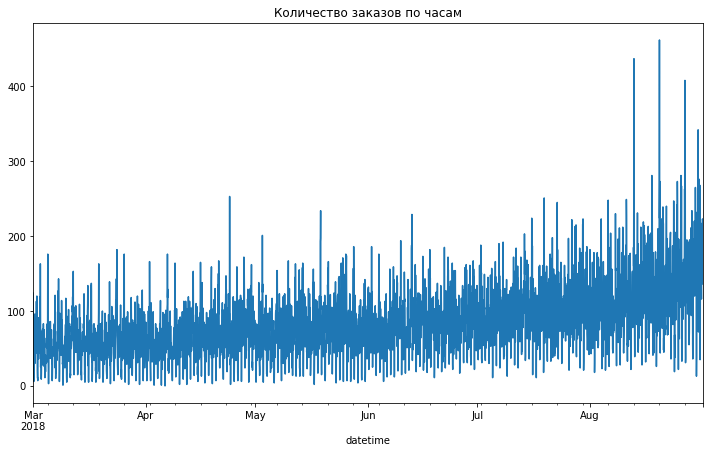

In [8]:
plt.figure(figsize=(12, 7))
plt.title('Количество заказов по часам')
df['num_orders'].plot()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


### Скользящее среднее

Проведем анализ на копии исходного датафрейма

In [10]:
df_test = df.copy()

In [11]:
df_test['rolling_mean'] = df_test['num_orders'].rolling(10).mean()
df_test=df_test.fillna(0)

<AxesSubplot:xlabel='datetime'>

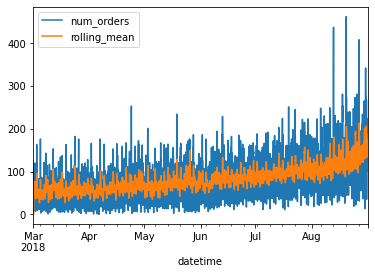

In [12]:
df_test.plot()

### Тренд и сезонная компонента

Разложим временной ряд на тренд и сезонную компоненту

In [13]:
decomposed = seasonal_decompose(df_test['num_orders'])

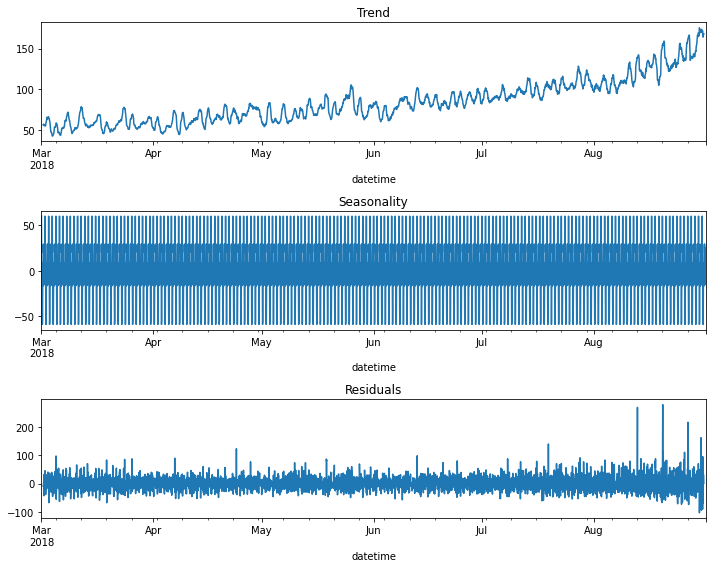

In [14]:
plt.figure(figsize=(10, 8))
plt.subplot(311)

decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)

decomposed.seasonal.plot(ax = plt.gca())
plt.title('Seasonality')
plt.subplot(313)

decomposed.resid.plot(ax = plt.gca())
plt.title('Residuals')
plt.tight_layout()

**ВЫВОД:**

Отмечается тренд на увеличение заказов в течение полугода. Сезонность оценим на меньшем временном отрезке.

Также отмечается тренд на увеличение с марта по август, а далее тренд получает ускорение.

Уменьшим интервал и посмотрим за неделю:

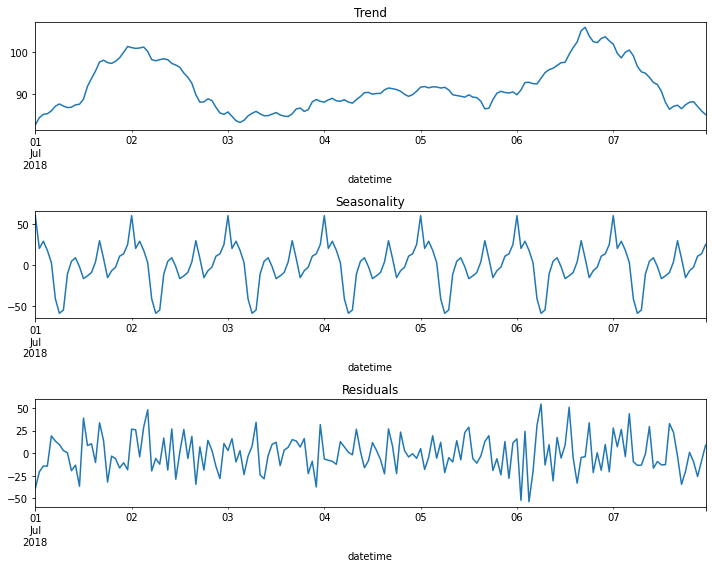

In [15]:
plt.figure(figsize=(10, 8))
plt.subplot(311)

decomposed.trend['2018-07-01':'2018-07-07'].plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)

decomposed.seasonal['2018-07-01':'2018-07-07'].plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)

decomposed.resid['2018-07-01':'2018-07-07'].plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

**ВЫВОД:**

Наблюдается сезонность по дням в течение недели.

Уменьшим интервал до суток:

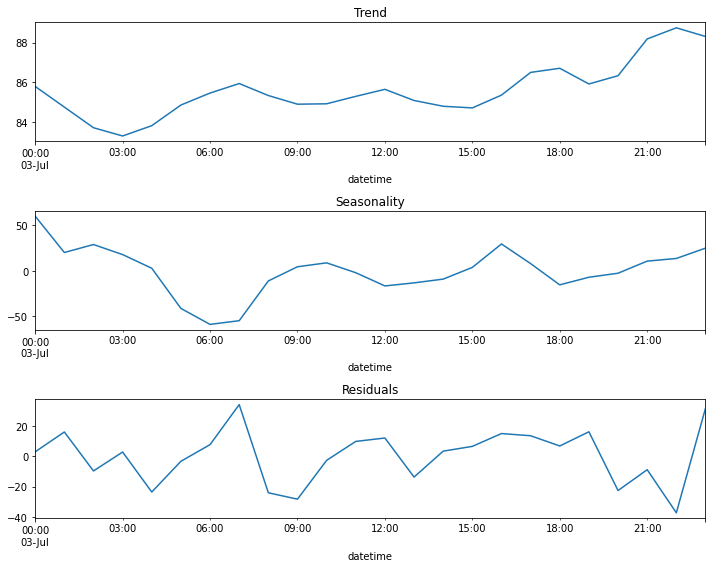

In [16]:
plt.figure(figsize=(10, 8))
plt.subplot(311)

decomposed.trend['2018-07-03'].plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)

decomposed.seasonal['2018-07-03'].plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)

decomposed.resid['2018-07-03'].plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

**ВЫВОД:**

В течение дня наблюдается тренд на увеличение заказов к вечеру.

### Стационарность ряда

Оценим стационарность ряда. Найдём скользящее стандартное отклонение

<AxesSubplot:xlabel='datetime'>

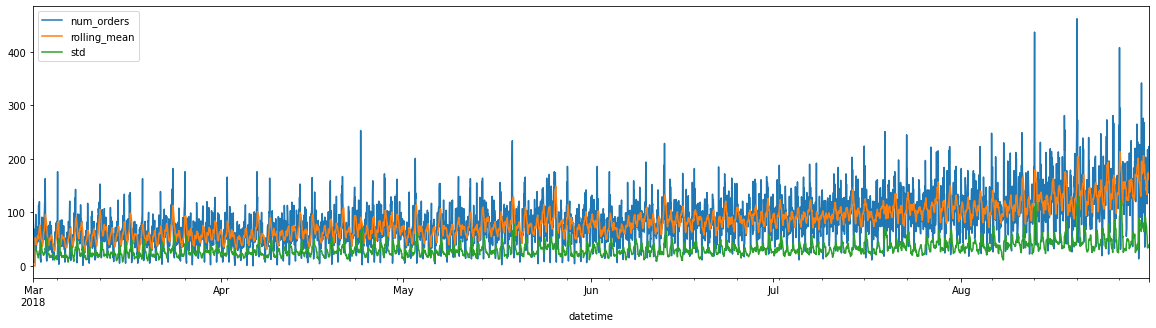

In [17]:
df_test['std'] = df_test['num_orders'].rolling(10).std()
df_test.plot(figsize=(20, 5))

**ВЫВОД:**

Среднее и стандартное отклонение растет со временем. Сделаем ряд стационарным

In [18]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


Протестуем, приводим ли наш ряд к стационарному. На графике изобразим скользящее среднее и скользящее стандартное отклонение

<AxesSubplot:xlabel='datetime'>

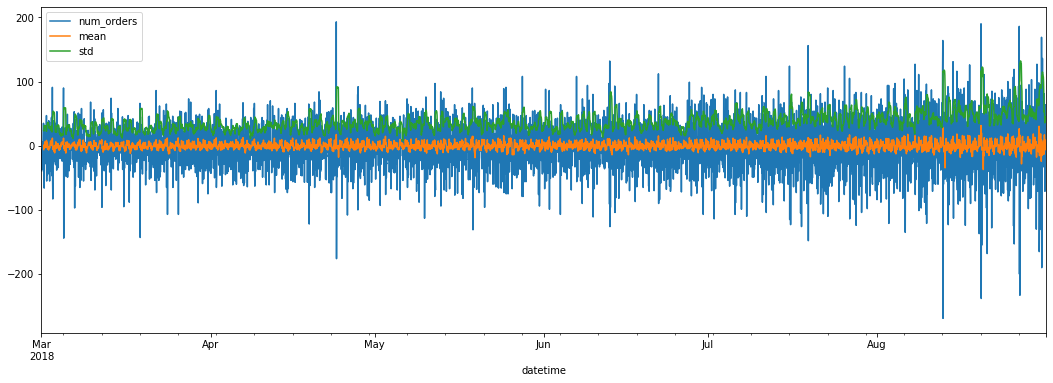

In [19]:
df_sh = df.copy()
df_sh = df_sh - df_sh.shift()
df_sh['mean'] = df_sh['num_orders'].rolling(10).mean()
df_sh['std'] = df_sh['num_orders'].rolling(10).std()
df_sh.plot(figsize=(18, 6))

**ВЫВОД:**

Проведен анализ данных.

Выявлена суточная сезонность: самый высокий спрос отмечен в вечерние часы пик, минимальный - в ночные часы.

Также отмечается тренд на увеличение с марта по август, а далее тренд получает ускорение.

## Обучение, подбор гиперпараметров

Напишем функцию, чтобы прибавить к таблице четыре новых календарных признака: год, месяц, день и день недели. 

In [20]:
def make_features(df, max_lag, rolling_mean_size):
    data = df.copy()
    data['hour'] = data.index.hour
        
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    return data

In [21]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [22]:
df_new = make_features(df, 24, 7)

In [23]:
df_new.head()

,num_orders,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Разобьем датафрейм на обучающую и тестовую выборки. Размер тестовой выборки 0.1. Из обучающей выборки удалим строки с пропусками.

In [24]:
train, test = train_test_split(df_new, shuffle=False, test_size=TEST_SIZE)
train = train.dropna()

In [25]:
X_train = train.drop(columns='num_orders')
y_train = train['num_orders']
X_test = test.drop(columns='num_orders')
y_test = test['num_orders']

Для подбора гиперпараметров моделей применим функцию TimeSeriesSplit(), которая предоставляет индексы для разделения образцов временных рядов данных.

In [26]:
cv_tss = TimeSeriesSplit(n_splits=5).split(X_train)

### Модель LinearRegression

In [27]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

rmse_lr = pd.Series(cross_val_score(model_lr,
                                              X_train,
                                              y_train,
                                              cv=cv_tss,
                                              scoring='neg_root_mean_squared_error')).mean()*(-1)

print('Средняя оценка качества модели LinearRegression:\n',rmse_lr)

Средняя оценка качества модели LinearRegression:
 27.138764785607503


### Модель DecisionTreeRegressor

In [28]:
cv_tss = TimeSeriesSplit(n_splits=5).split(X_train)

model_dtr = DecisionTreeRegressor()
parameters = [{'max_depth': [1, 5, 15],
                'random_state':[123456]}]

gs = GridSearchCV(model_dtr,
                   parameters,
                   cv=cv_tss,
                   scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

means = gs.cv_results_['mean_test_score']
rmse_dtr = (max(means)*-1) ** 0.5

print('Лучшие параметры:', gs.best_params_)
print()
print('Средняя оценка качества модели DecisionTreeRegressor:\n', rmse_dtr)

Лучшие параметры: {'max_depth': 5, 'random_state': 123456}

Средняя оценка качества модели DecisionTreeRegressor:
 29.71207792816873


### Модель CatBoostRegressor

In [29]:
cv_tss = TimeSeriesSplit(n_splits=5).split(X_train)

model_cbr = CatBoostRegressor() 
parameters = [{'learning_rate':[0.1, 0.5, 0.8],
               'random_state':[123456],
               'verbose':[False]}]

gs = GridSearchCV(model_cbr, 
                  parameters,
                  cv = cv_tss,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

means = gs.cv_results_['mean_test_score']
rmse_cbr = (max(means)*-1) ** 0.5

print('Лучшие параметры:', gs.best_params_)
print()
print('Средняя оценка качества модели CatBoostRegressor:\n', rmse_cbr)

Лучшие параметры: {'learning_rate': 0.1, 'random_state': 123456, 'verbose': False}

Средняя оценка качества модели CatBoostRegressor:
 24.655265165168768


### Выбор модели

In [30]:
model_analysis = pd.DataFrame(index = ['LinearRegression',
                                       'DecisionTreeRegressor',
                                       'CatBoostRegressor'],
                              columns = ['RMSE на тренировочной выборке'])

In [31]:
model_analysis['RMSE на тренировочной выборке'] = (rmse_lr,
                                                   rmse_dtr,
                                                   rmse_cbr)

In [32]:
model_analysis.sort_values(by = ['RMSE на тренировочной выборке'])

,RMSE на тренировочной выборке
CatBoostRegressor,24.655265
LinearRegression,27.138765
DecisionTreeRegressor,29.712078


**ВЫВОД:**

Лучшая мертика RMSE (24.66) у модели CatBoostRegressor.

## Тестирование лучшей модели

In [33]:
model_cbr = CatBoostRegressor(learning_rate=0.1, 
                              random_state=123456, 
                              verbose=False) 
model_cbr.fit(X_train, y_train)

best_model_pred = model_cbr.predict(X_test)
best_model_rmse = mean_squared_error(y_test, best_model_pred, squared=False)
print('Качество лучшей модели на тестовой выборке:\n','RMSE = ', round(best_model_rmse, 2))

Качество лучшей модели на тестовой выборке:
 RMSE =  41.29


**ВЫВОД:**

На основании исторические данные о заказах такси в аэропортах, собранных компанией «Чётенькое такси» был проведен анализ. 
Выявлен тренд на увеличение количества заказов такси в течение суток. Самый высокий спрос отмечен в вечерние часы пик, минимальный - в ночные часы.
Наблюдается сезонность по суткам в течение недели.

Построены 3 модели для предсказания количества заказов такси на следующий час:

LinearRegression
DecisionTreeRegressor
CatBoostRegressor

Подобраны оптимальные гиперпараметры для моделей.

Требованию значения метрики RMSE на тестовой выборке не больше 48, соответствует модель CatBoostRegressor.

Наилучший показатель RMSE в данном случае у CatBoostRegressor = 43,1

**РЕКОМЕНДАЦИИ:**
Чтобы привлекать больше водителей в период пиковой нагрузки в качестве модели количества заказов такси на следующий час компании «Чётенькое такси» рекомендовано использовать модель CatBoostRegressor.